# Solving Eigenvalues and Transport Problems of One-Dimensional Schrodinger Equation

## $-\frac{ħ^{2}}{2m}\frac{d^{2}ψ(x)}{dx^{2}}+V(x)ψ(x)=Eψ(x)$


This is the one dimentional Time Independent Schrodinger Equation (TISE),

where,

* *m* is the mass of the particle.
* *ħ* is the reduced Planck constant.
* $E$ is the energy level.
* $ψ(x)$ is the wave function.
* $V(x)$ is the potential.



We can rewrite the Schrodinger equation in the form of 

$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} + V(x)\psi = E\psi
$$


which is in the same form as the linear shooting method (also known as the Sturm-Liouville problem) with:

- $ p(x) = 1 $
- $ q(x) = \frac{2m[E - V(x)]}{\hbar^2} $
- $ r(x) = 0 $

**The Eigenvalue Problem**

For the eigenvalue problem, the particle is confined by the potential well $V(x)$ so that $\psi(x) \rightarrow 0$ with $x \rightarrow \infty$. To solve this eigenvalue problem, we can integrate the equation with the Numerov algorithm either from left to right or right to left of the potential region.

Since the wavefunction goes to zero as $|x| \rightarrow \infty$, the integration from one side to another requires integrating from an exponentially increasing region to an oscillatory region and then into an exponentially decreasing region.

To solve and reduce error when integrating the region, we need to integrate/obtain the solutions from both sides and match them in the well region. Matching is done when the energy is equal to the potential energy, i.e., $x_1$ and $x_r$. The so-called matching here is to adjust the trial eigenvalue until the solution integrated from the right $\psi_r(x)$, and the solution integrated from the left $\psi_l(x)$ satisfy the boundary conditions at one of the turning points.

Choosing the turning point, the continuity conditions are:

$$
\psi_l(x_r) = \psi_r(x_r)
$$
$$
\psi_l'(x_r) = \psi_r'(x_r)
$$

If we combine these two conditions, we have:

$ \frac{\psi_l'(x_r)}{\psi_l(x_r)} = \frac{\psi_r'(x_r)}{\psi_r(x_r)} $

Using the three point formula for the first-order, we have:

$ f(E) = \frac{[\psi_l(x_r + h) - \psi_l(x_r - h)] - [\psi_r(x_r + h) - \psi_r(x_r - h)]}{2h\psi(x_r)} = 0 $

The function can be solved using a root search scheme.

For the bound particle in the potential well:

$$
V(x) = \frac{\hbar^2}{2m} \alpha^2 \lambda (\lambda - 1) \left[ \frac{1}{2} - \frac{1}{\cosh^2(\alpha x)} \right]
$$

The Schrödinger equation with this potential can be solved exactly with the eigenvalues:

$$
E_n = \frac{\hbar^2}{2m} \alpha^2 \left[ \frac{\lambda (\lambda - 1)}{2} - (\lambda - 1 - n)^2 \right]
$$

for $n = 0, 1, 2, \ldots$ with the values of $\alpha = 1$, $\lambda = 4$. For convenience, it is assumed that $\hbar = m = 1$.


**Using Python to Solve for One-Dimentional TISE Using Numrov Method**

**1. Importing Required Libraries**

First, we need to import the necessary libraries:
- NumPy: For numerical array operations.
- Matplotlib: For visualizing the wavefunction and eigenvalues.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

**2. Defining the Parameters**

The potential function $ V(x) $ is defined using the given parameters $ \alpha $ and $\lambda $. 

The equation for $ V(x) $ is:
$$
V(x) = \frac{\alpha^2 \lambda (\lambda - 1)}{2} \left( 0.5 - \frac{1}{\cosh^2(\alpha x)} \right),
$$
which is used in the Schrödinger equation to determine the particle's behavior in the potential well.


In [15]:
def potential(x, alpha=1, lamb=4):
    """Hyperbolic potential function V(x)"""
    return alpha**2 * lamb * (lamb - 1) * (0.5 - 1 / np.cosh(alpha * x)**2) / 2

**3. Implementing the Numerov Algorithm**

The Numerov algorithm solves second-order differential equations with high accuracy. 

It calculates the wavefunction values $ u_i $ iteratively using:
$$
u_{i+1} = \frac{2u_i(1 - \frac{5}{12} h^2 q_i) - u_{i-1}(1 + \frac{1}{12} h^2 q_{i-1})}{1 + \frac{1}{12} h^2 q_{i+1}},
$$
where $ h $ is the step size, and $ q(x) $ is derived from the potential and energy.


In [16]:
def numerov(u0, u1, q, h):
    """Numerov algorithm for solving the Schrödinger equation"""
    n = len(q)
    u = np.zeros(n)
    u[0] = u0
    u[1] = u1
    g = h**2 / 12
    for i in range(1, n - 1):
        c0 = 1 + g * q[i - 1]
        c1 = 2 - 10 * g * q[i]
        c2 = 1 + g * q[i + 1]
        u[i + 1] = (c1 * u[i] - c0 * u[i - 1]) / c2
    return u

**4. Normalizing the Wavefunction**

The wavefunction is normalized so that the total probability density equals 1:
$$
\int_{-\infty}^\infty |\psi(x)|^2 dx = 1.
$$

In discrete form, this becomes:
$$
\psi_{\text{normalized}} = \frac{\psi}{\sqrt{\sum |\psi_i|^2 h}}.
$$
This ensures the solution satisfies the boundary conditions.


In [17]:
def normalize(u, h):
    """Normalize the wavefunction"""
    norm = np.sqrt(np.sum(u**2) * h)
    return u / norm

**5. Solving the Schrödinger Equation**

This function computes the wavefunction $ \psi(x) $ for a given energy $ E $. The steps involved are:

- Compute the potential \( q(x) \) using the given energy.
- Integrate from both sides of the potential using the Numerov algorithm:
  - $ u_l $: Wavefunction from the left.
  - $ u_r $: Wavefunction from the right (reversed).
- Match the left and right wavefunctions to ensure continuity and smoothness at the turning point.
- Normalize the final wavefunction.


In [18]:
def solve_schrodinger(e, x, h):
    """Solve Schrödinger equation using Numerov algorithm"""
    n = len(x)
    ql = 2 * (e - potential(x))
    qr = ql[::-1]
    
    im = np.argmax((ql[:-1] * ql[1:] < 0) & (ql[:-1] > 0))

    ul = numerov(0, 0.01, ql[:im + 2], h)
    ur = numerov(0, 0.01, qr[:n - im + 2], h)

    ratio = ur[n - im - 2] / ul[im]
    u = np.zeros(n)
    u[:im] = ratio * ul[:im]
    u[im:] = ur[:n - im][::-1]

    return normalize(u, h)

**6. Matching Condition**

The matching condition ensures that the wavefunction is smooth and continuous at the turning point \( x_t \). 

The function evaluates the difference in slopes between the left and right wavefunctions at \( x_t \):
$$
f(E) = u_r(x_t) - u_l(x_t).
$$
The correct eigenvalue $ E $ satisfies $ f(E) = 0 $.


In [19]:
def match_condition(e, x, h):
    """Matching condition for the root finding"""
    n = len(x)
    ql = 2 * (e - potential(x))
    qr = ql[::-1]

    im = np.argmax((ql[:-1] * ql[1:] < 0) & (ql[:-1] > 0))

    ul = numerov(0, 0.01, ql[:im + 2], h)
    ur = numerov(0, 0.01, qr[:n - im + 2], h)

    return ur[n - im - 2] - ul[im]

**7. Secant Method for Eigenvalue**

The secant method finds the eigenvalue $ E $ that satisfies the matching condition. 

The method starts with two guesses $ e_0 $ and $ e_1 $ and iterates using:
$$
E_{n+1} = E_n - \frac{f(E_n) (E_n - E_{n-1})}{f(E_n) - f(E_{n-1})}.
$$
It stops when the difference between successive values is below the tolerance $ \text{tol} $.


In [20]:
def secant_method(func, e0, e1, tol, max_iter, x, h):
    """Find root of the matching condition using the secant method"""
    for _ in range(max_iter):
        f0 = func(e0, x, h)
        f1 = func(e1, x, h)
        e2 = e1 - f1 * (e1 - e0) / (f1 - f0)
        if abs(e2 - e1) < tol:
            return e2
        e0, e1 = e1, e2
    raise ValueError("Secant method did not converge")

**8. Main Execution**

- Defining the spatial grid $ x $ and step size $ h $.
- Using the secant method to find the eigenvalue $ E $.
- Solving for the wavefunction $ \psi(x) $ using the Numerov algorithm.
- Normalizing and plotting the wavefunction.

The eigenvalue $ E $ and corresponding wavefunction $ \psi(x) $ are the solution to the Schrödinger equation.


The eigenvalue: 2.505582


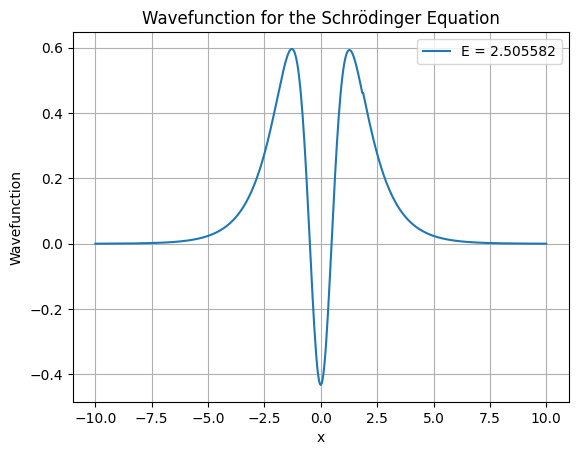

In [21]:
# Parameters
x1, x2 = -10, 10
nx = 500
h = (x2 - x1) / nx
x = np.linspace(x1, x2, nx + 1)

# Initial guesses for eigenvalue
e0, e1 = 2.4, 2.5
tol = 1e-6
max_iter = 100

# Solve for eigenvalue
eigenvalue = secant_method(match_condition, e0, e1, tol, max_iter, x, h)
print(f"The eigenvalue: {eigenvalue:.6f}")

# Solve for wavefunction
wavefunction = solve_schrodinger(eigenvalue, x, h)

# Plot wavefunction
plt.plot(x, wavefunction, label=f"E = {eigenvalue:.6f}")
plt.xlabel("x")
plt.ylabel("Wavefunction")
plt.title("Wavefunction for the Schrödinger Equation")
plt.legend()
plt.grid()
plt.show()